In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings("ignore")
#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#normalising data library
from sklearn.preprocessing import StandardScaler
#splitting data library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error #error calculation
from sklearn.metrics import r2_score #error calculation
#classifier libraries
from sklearn.linear_model import LinearRegression #linear regression

In [2]:
df = pd.read_csv("../input/walmart-dataretail-analysis/Walmart_Store_sales.csv")
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [3]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe() #looking for missing data -1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.isnull().sum() #checking for null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().sum() #checking for duplicated rows

0

<h4><center>Which store has maximum sales?</center></h4>

In [7]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
top_shop = store_sales.sort_values(ascending=False).astype('int64').index[0]

<h4><center>Answer:Store number 20</center></h4>

<h4><center>Which store has maximum standard deviation?</center></h4>

In [8]:
print(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).index[0])
   

14


<h4><center>Answer:Store number 14</center></h4>

The average sale price is: 1074148.3917777783


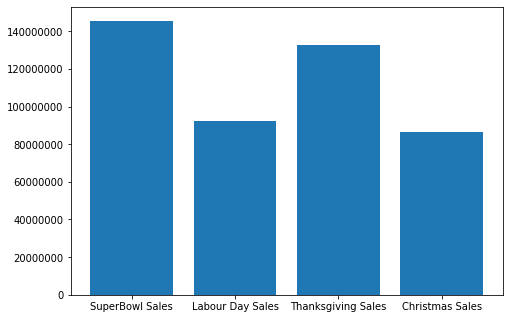

In [9]:
superbowl_sales = df[df["Date"] == "12-02-2010"]['Weekly_Sales'].sum() + df[df["Date"] == "11-02-2011"]['Weekly_Sales'].sum() + df[df["Date"] == "10-02-2012"]['Weekly_Sales'].sum()
labour_day_sales = df[df["Date"] == "10-09-2010"]['Weekly_Sales'].sum() + df[df["Date"] == "09-09-2011"]['Weekly_Sales'].sum() + df[df["Date"] == "10-07-2012"]['Weekly_Sales'].sum()
thanksgiving_day_sales = df[df["Date"]=="26-11-2010"]['Weekly_Sales'].sum()+df[df["Date"]=="25-11-2011"]['Weekly_Sales'].sum() + df[df["Date"]=="23-11-2012"]['Weekly_Sales'].sum()
christmas_sales = df[df["Date"] == "31-12-2010"]['Weekly_Sales'].sum() + df[df["Date"] == "30-12-2011"]['Weekly_Sales'].sum() + df[df["Date"] == "28-12-2012"]['Weekly_Sales'].sum()

print("The average sale price is:",df[df["Date"] == "12-02-2010"]['Weekly_Sales'].mean())

fig = plt.figure()
holidays = ["SuperBowl Sales","Labour Day Sales","Thanksgiving Sales","Christmas Sales"] 
sales = [superbowl_sales,labour_day_sales,thanksgiving_day_sales,christmas_sales]
ax = fig.add_axes([0,0,1,1])
ax.ticklabel_format(style = 'plain')
ax.bar(holidays,sales)

plt.show()


<h3><center>Labour Day sales and Christmas Sales are under average</center></h3>

In [10]:
df
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby([df['Date'],df['Store']])['Weekly_Sales'].agg(sum).reset_index()
monthly_sales['Year'] = monthly_sales['Date'].dt.year
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Quarter'] = monthly_sales['Date'].dt.quarter

for month in range(1,13):
    df_copy=monthly_sales[monthly_sales["Month"]==month]
    fig = px.bar(df_copy, x="Store", y="Weekly_Sales",color='Weekly_Sales',width=500, height=400,title="Month "+str(month)+" sales by store",
                 labels={
                     "Weekly_Sales": "Sales",
                     "sepal_width": "Store number",
                     
                 },)
    fig.show()

In [11]:
store1=df[df['Store']==1]
store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


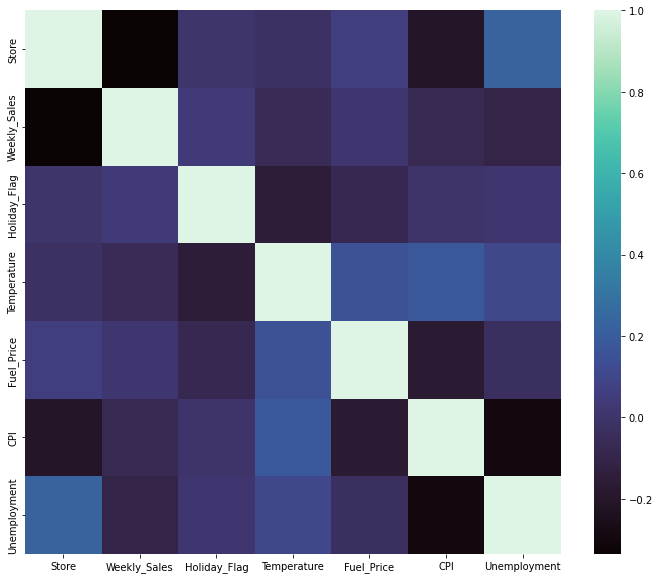

In [12]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='mako')
plt.show()

In [13]:
y = pd.get_dummies(df["Store"]) #One hot encoding the store 
df = df.drop('Store',axis = 1)
# Join the encoded df
df = df.join(y)

r2 score is  0.9182865757083427
mean_sqrd_error is== 24752602109.214684
root_mean_squared error of is== 157329.59705412926


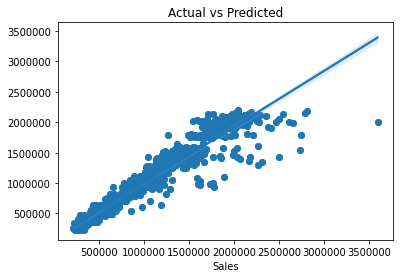

In [14]:
X = df.drop(["Date","Weekly_Sales"],axis=1)
y = df[["Weekly_Sales"]]
scaler = StandardScaler()
scaled_temperature = scaler.fit_transform(df[['Temperature']]) #scaling the time column
df['Temperature'] = scaled_temperature
scaled_Fuel_Price = scaler.fit_transform(df[['Fuel_Price']]) #scaling the time column
df['Fuel_Price'] = scaled_Fuel_Price
scaled_Unemployment = scaler.fit_transform(df[['Unemployment']]) #scaling the time column
df['Unemployment'] = scaled_Unemployment

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
regressor = LinearRegression() #initialising linear regression
regressor.fit(X_train,y_train) #fitting the data
y_pred = regressor.predict(X_test) #predict the result


plt.scatter(y_test,y_pred) #plotting the answers vs the results
plt.ticklabel_format(style = 'plain')
sns.set(rc={'figure.figsize':(18,12)})
sns.regplot(x=y_test, y=y_pred);

plt.xlabel("Sales")
plt.title("Actual vs Predicted",)
#the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is ",score) #printing the accyracy
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))